In [34]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", context="notebook", rc={"figure.figsize":(12, 6)})

In [35]:
dataset_train = pd.read_csv(os.path.join("data", "train.csv"), low_memory=False)
dataset_train["Datum_Uhrzeit_CET"] = pd.to_datetime(dataset_train["Datum_Uhrzeit_CET"], errors="coerce")

dataset_test = pd.read_csv(os.path.join("data", "test.csv"), low_memory=False)
dataset_test["Datum_Uhrzeit_CET"] = pd.to_datetime(dataset_test["Datum_Uhrzeit_CET"], errors="coerce")

In [36]:
dataset_train.head()

,id,Datum_Uhrzeit_CET,Demand,correction,correctedDemand,FRCE,controlBandPos,controlBandNeg,LFCInput,aFRRactivation,aFRRrequest,participationCMO,participationIN,correctionEcho,BandLimitedCorrectedDemand,controlArea
0,0,2022-10-23 00:00:04,-200.723,200.723,0.000,58.0890,127,-125.0,137.5740,-58.0890,-11.097600,1.0,1.0,249.719,0.0,2
1,1,2022-10-23 00:00:04,-656.771,134.514,-522.256,-265.9470,249,-167.0,-221.6890,-256.3040,-167.000000,1.0,1.0,185.760,-167.0,1
2,2,2022-10-23 00:00:08,-196.995,196.995,0.000,56.3801,127,-125.0,109.1030,-56.3800,0.261344,1.0,1.0,200.723,0.0,2
3,3,2022-10-23 00:00:08,-639.424,158.032,-481.392,-223.3750,249,-167.0,-219.0110,-258.0160,-167.000000,1.0,1.0,183.128,-167.0,1
4,4,2022-10-23 00:00:12,-206.247,206.247,0.000,53.3933,127,-125.0,47.8701,-53.3923,1.914730,1.0,1.0,196.995,0.0,2


## Check 1: Consistency of `correctedDemand`

According to the signal flow diagram given in the MURAL board, `correctedDemand` = `Demand` + `correction`. The following function calculates the corrected demand from the available `Demand` and `correction` columns and compares it to the data provided in the `correctedDemand` column. Each deviation is considered as an anomaly.

In [39]:
def check_anomaly_corrected_demand(
        demand: pd.Series, 
        correction: pd.Series, 
        corrected_demand: pd.Series,
        threshold: float = 0.01,
    ) -> pd.Series:
    corrected_demand_calculated = demand + correction
    corrected_demand_deviation = np.abs(corrected_demand - corrected_demand_calculated)

    return corrected_demand_deviation > threshold

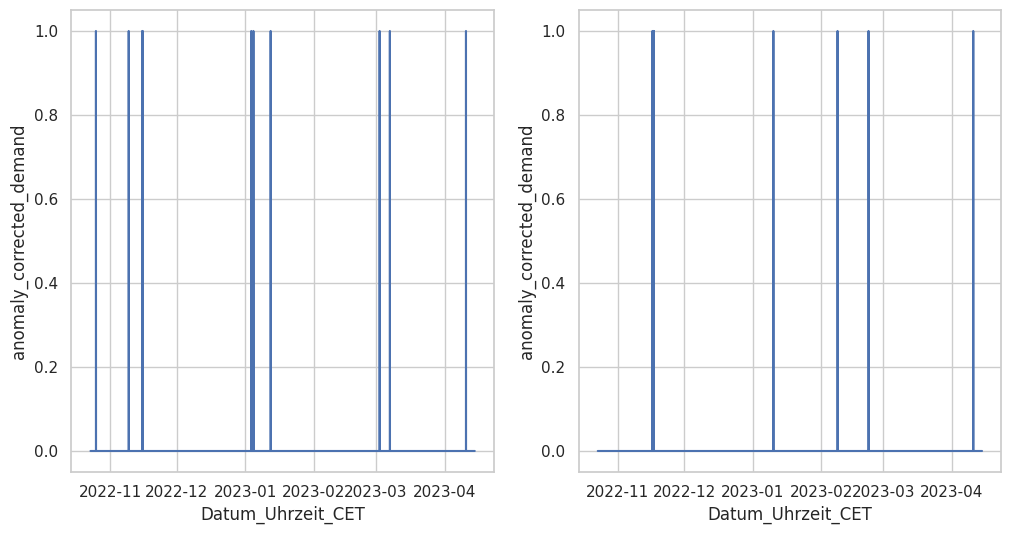

In [40]:
fig, axs = plt.subplots(1, 2)

for idx, control_area in enumerate([1, 2]):
    area_subset_train = dataset_train[dataset_train["controlArea"] == control_area]
    anomaly_corrected_demand = check_anomaly_corrected_demand(
        area_subset_train["Demand"],
        area_subset_train["correction"],
        area_subset_train["correctedDemand"],
    )

    with pd.option_context("mode.chained_assignment", None):
        area_subset_train["anomaly_corrected_demand"] = anomaly_corrected_demand

    sns.lineplot(x="Datum_Uhrzeit_CET", y="anomaly_corrected_demand", data=area_subset_train, ax=axs[idx])

plt.show()

## Legacy Plotting Stuff

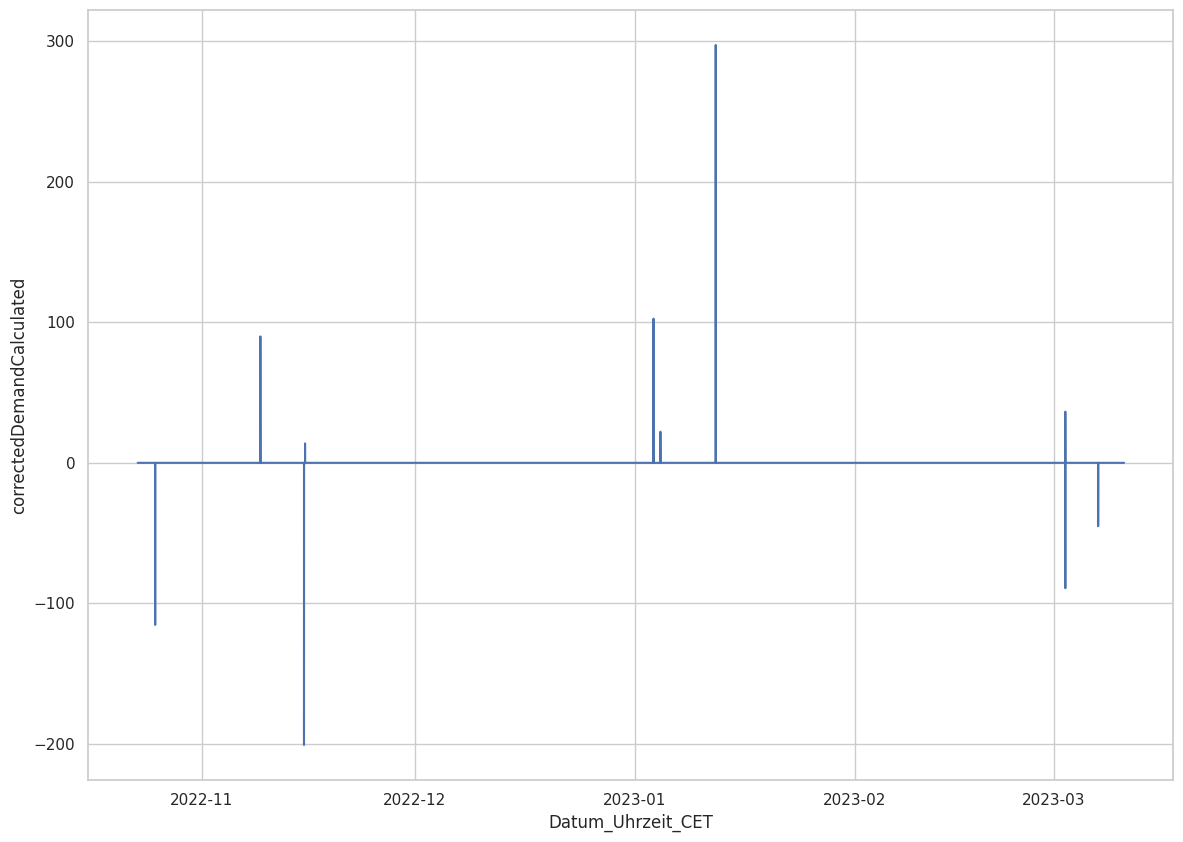

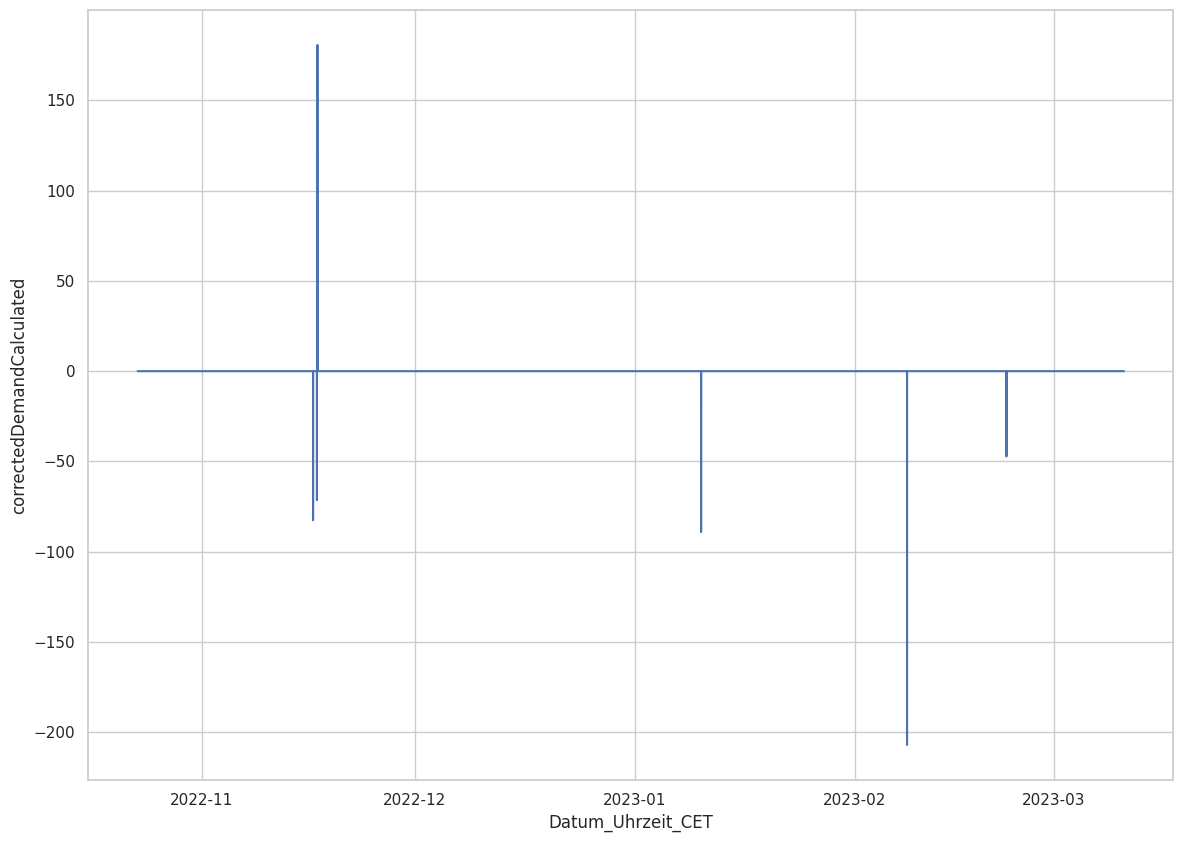

In [13]:
NUM_STEPS_THRESHOLD = 3000000

for control_area in [1, 2]:
    area_subset_train = dataset_train[dataset_train["controlArea"] == control_area][:NUM_STEPS_THRESHOLD]
    area_subset_train["aFRRdifference"] = (area_subset_train["aFRRactivation"] - area_subset_train["aFRRrequest"]).abs()
    area_subset_train["aFRRdifferenceShift"] = (area_subset_train["aFRRactivation"] - area_subset_train["aFRRrequest"].shift(periods=100)).abs()
    area_subset_train["correctedDemandCalculated"] = area_subset_train["correctedDemand"] - (area_subset_train["Demand"] + area_subset_train["correction"])

    fig, ax = plt.subplots()

    #sns.lineplot(x="Datum_Uhrzeit_CET", y="aFRRdifference", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="aFRRdifferenceShift", data=area_subset_train, ax=ax)

    #sns.lineplot(x="Datum_Uhrzeit_CET", y="correctedDemand", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="correctedDemandCalculated", data=area_subset_train, ax=ax)

    #sns.lineplot(x="Datum_Uhrzeit_CET", y="Demand", data=area_subset_train, ax=ax, legend="full")
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="correction", data=area_subset_train, ax=ax, legend="full")
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="correctedDemand", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="FRCE", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="controlBandPos", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="controlBandNeg", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="LFCInput", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="aFRRactivation", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="aFRRrequest", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="participationCMO", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="participationIN", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="correctionEcho", data=area_subset_train, ax=ax)
    #sns.lineplot(x="Datum_Uhrzeit_CET", y="BandLimitedCorrectedDemand", data=area_subset_train, ax=ax)

    #plt.legend(["Demand", "Correction", "CorrectedDemand"])

    plt.show()

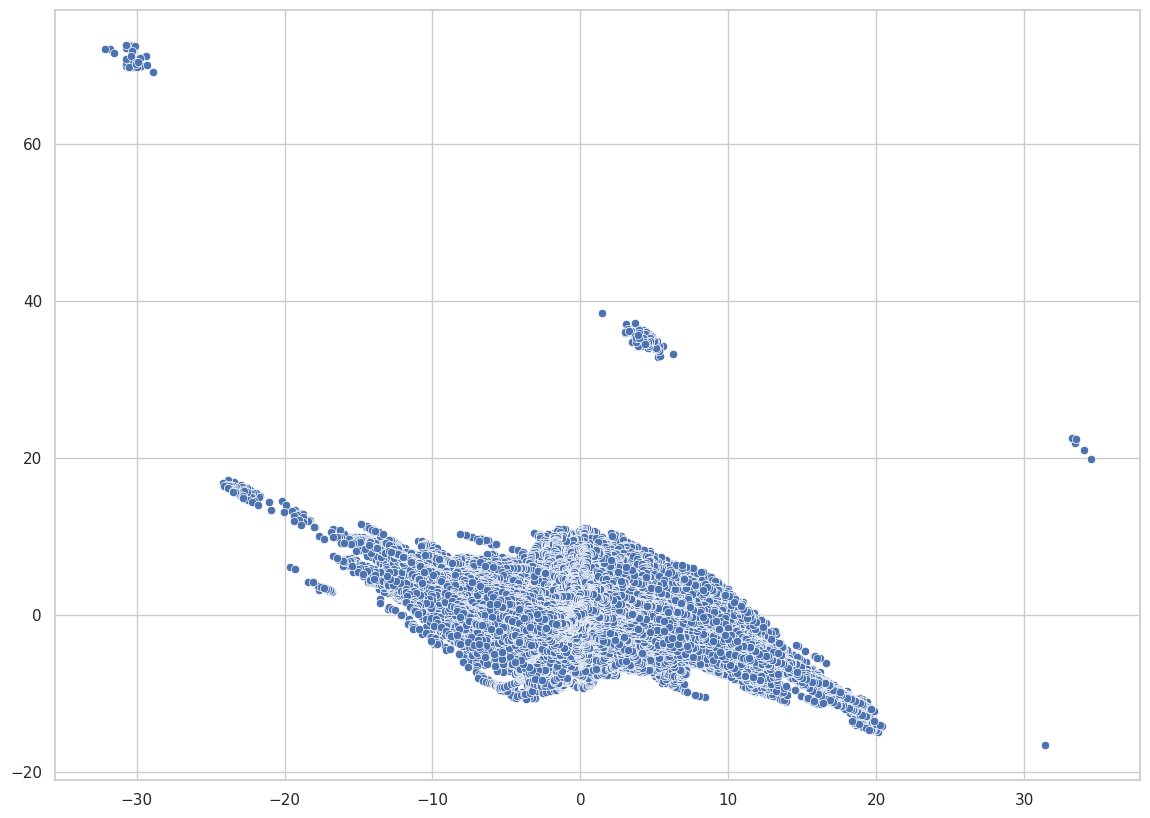

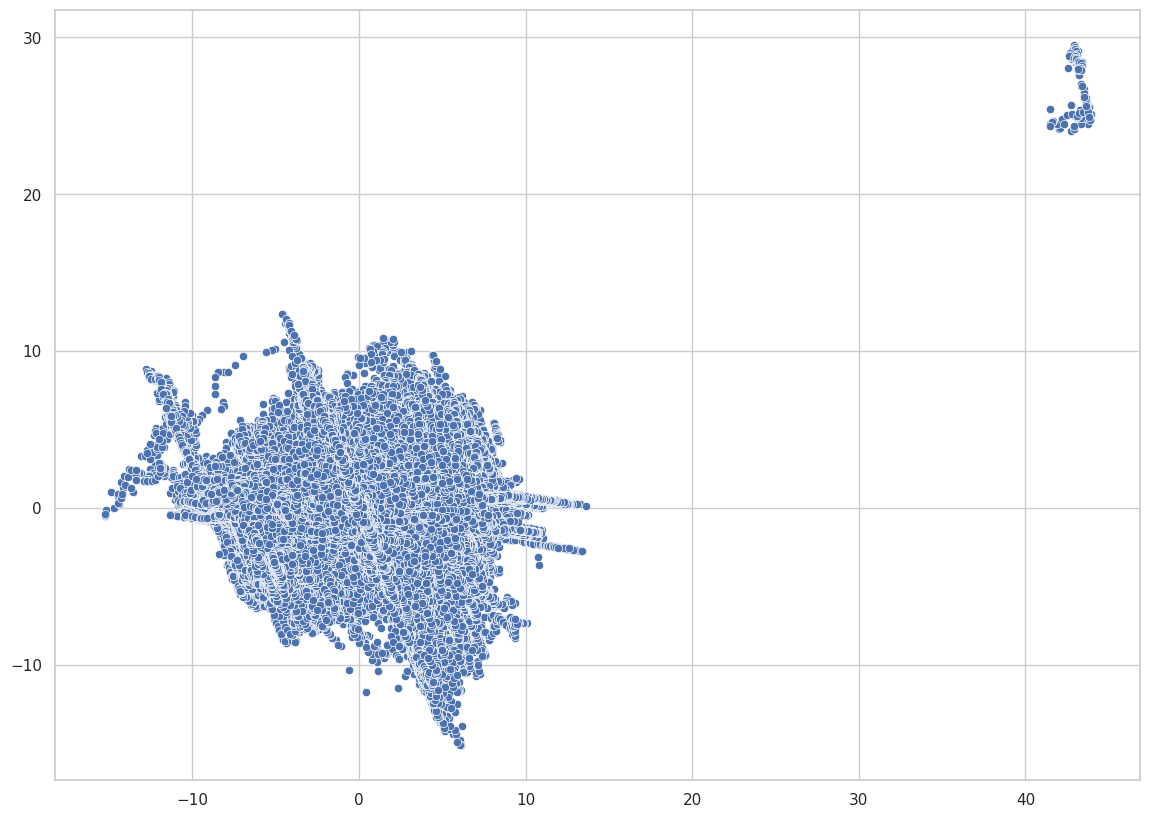

In [5]:
features = [
    "Demand", 
    "correction", 
    "correctedDemand", 
    "FRCE", 
    "controlBandPos", 
    "controlBandNeg", 
    "LFCInput", 
    "aFRRactivation", 
    "aFRRrequest", 
    "participationCMO", 
    "participationIN", 
    "correctionEcho", 
    "BandLimitedCorrectedDemand",
]

for control_area in [1, 2]:
    area_subset_train = dataset_train[dataset_train["controlArea"] == control_area]
    area_subset_train_scaled = StandardScaler().fit_transform(area_subset_train[features].values)

    mapper = PCA(n_components=2)
    embedding = mapper.fit_transform(area_subset_train_scaled)

    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1])
    plt.show()
